In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def compress_image_kmeans(image, k, batch_size=10000, n_init='auto'):
    # Convert image to numpy array
    img = np.array(image)
    h, w, c = img.shape
    pixels = img.reshape(-1, c)

    # Apply MiniBatchKMeans with explicit n_init
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, n_init=n_init)
    kmeans.fit(pixels)
    
    # Replace each pixel by its centroid
    new_colors = kmeans.cluster_centers_[kmeans.predict(pixels)]
    new_image = new_colors.reshape(h, w, c).astype(np.uint8)

    return Image.fromarray(new_image), kmeans

In [3]:
def show_images_side_by_side(image, compressed_image):
    # Convert images to numpy arrays
    original_array = np.array(image)
    compressed_array = np.array(compressed_image)

    # Create a figure to display the images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_array)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Compressed Image')
    plt.imshow(compressed_array)
    plt.axis('off')
    
    plt.show()

In [4]:
def show_centroid_colors(kmeans):
    colors = kmeans.cluster_centers_
    
    # Create a palette by expanding dimensions of the centroids array
    palette = np.expand_dims(colors, axis=0)
    
    # Create a figure to display the colors
    plt.figure(figsize=(16, 2))
    plt.title('Centroid Colors')
    
    # Set x-ticks to correspond to the centroids
    num = np.arange(len(colors))
    plt.xticks(num)
    plt.yticks([])
    
    # Display the palette
    plt.imshow(palette / 255.0)  # Normalize color to [0, 1] range
    
    plt.show()


In [10]:
# Example usage
image_path = 'ikeashark.JPG'
image = Image.open(image_path)
compressed_image, kmeans = compress_image_kmeans(image, k=16)

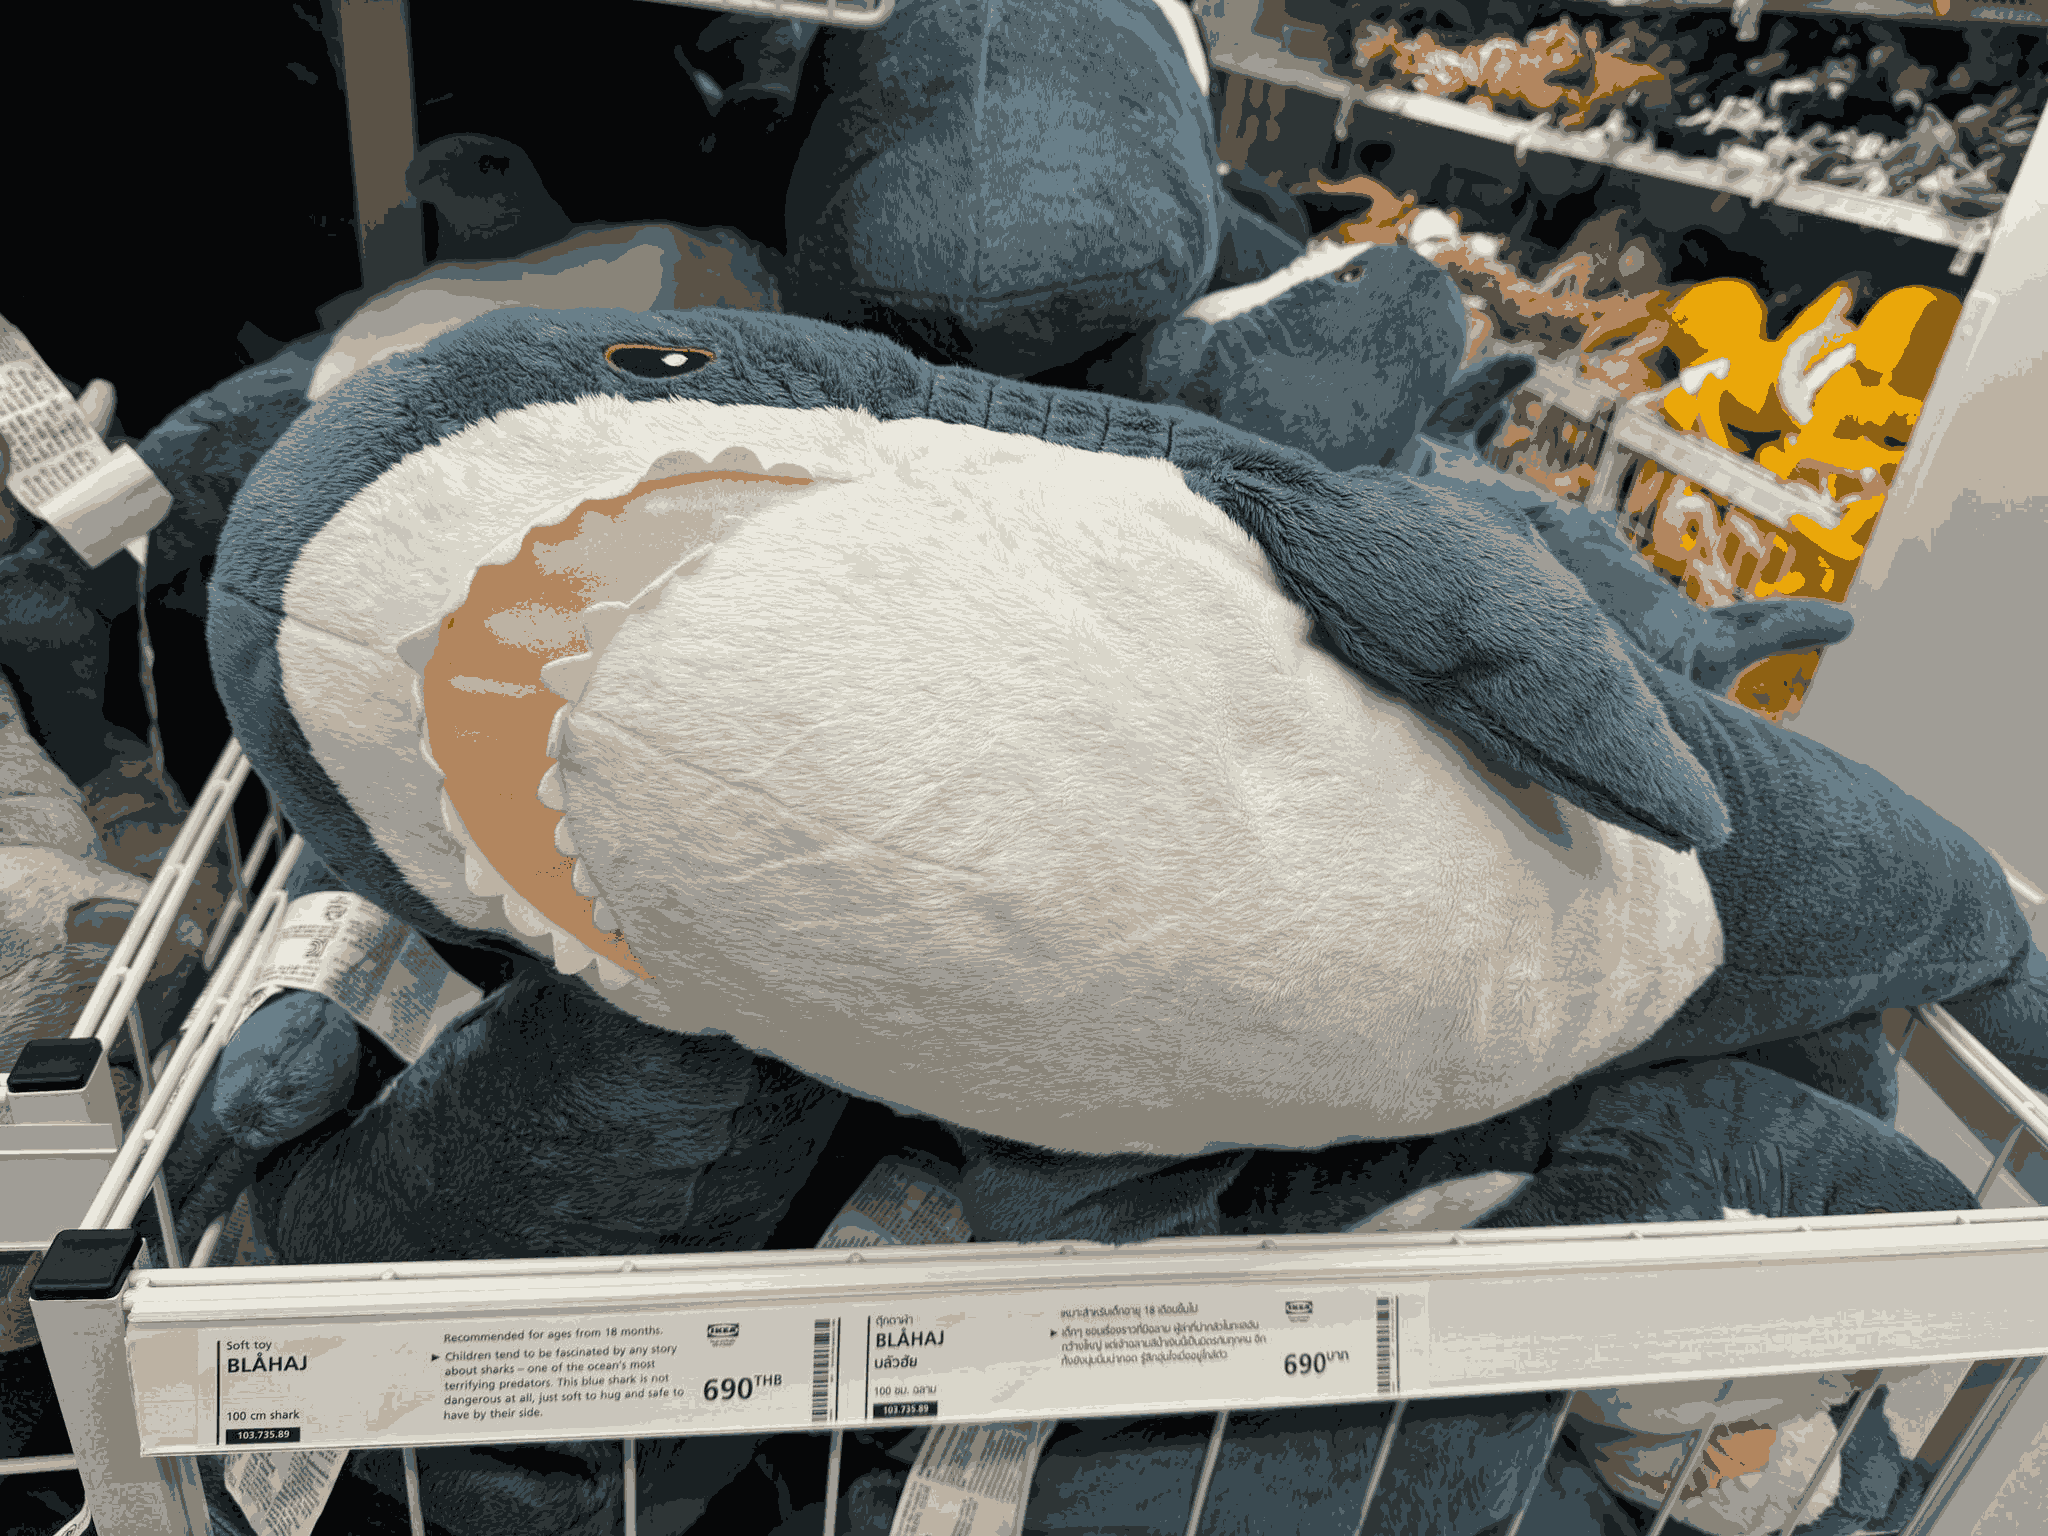

In [12]:
# Show the compressed image
display(compressed_image)

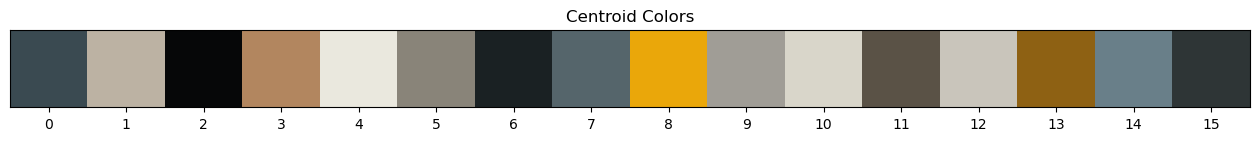

In [14]:
# Display the centroid colors
show_centroid_colors(kmeans)

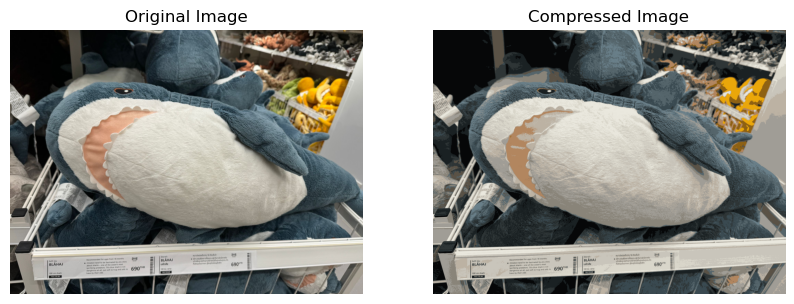

In [16]:
# Compare the original image and the compressed image side by side
show_images_side_by_side(image, compressed_image)

In [26]:
# Another example
image_path = 'pancake_burger.JPG'
image = Image.open(image_path)
compressed_image, kmeans = compress_image_kmeans(image, k=16)

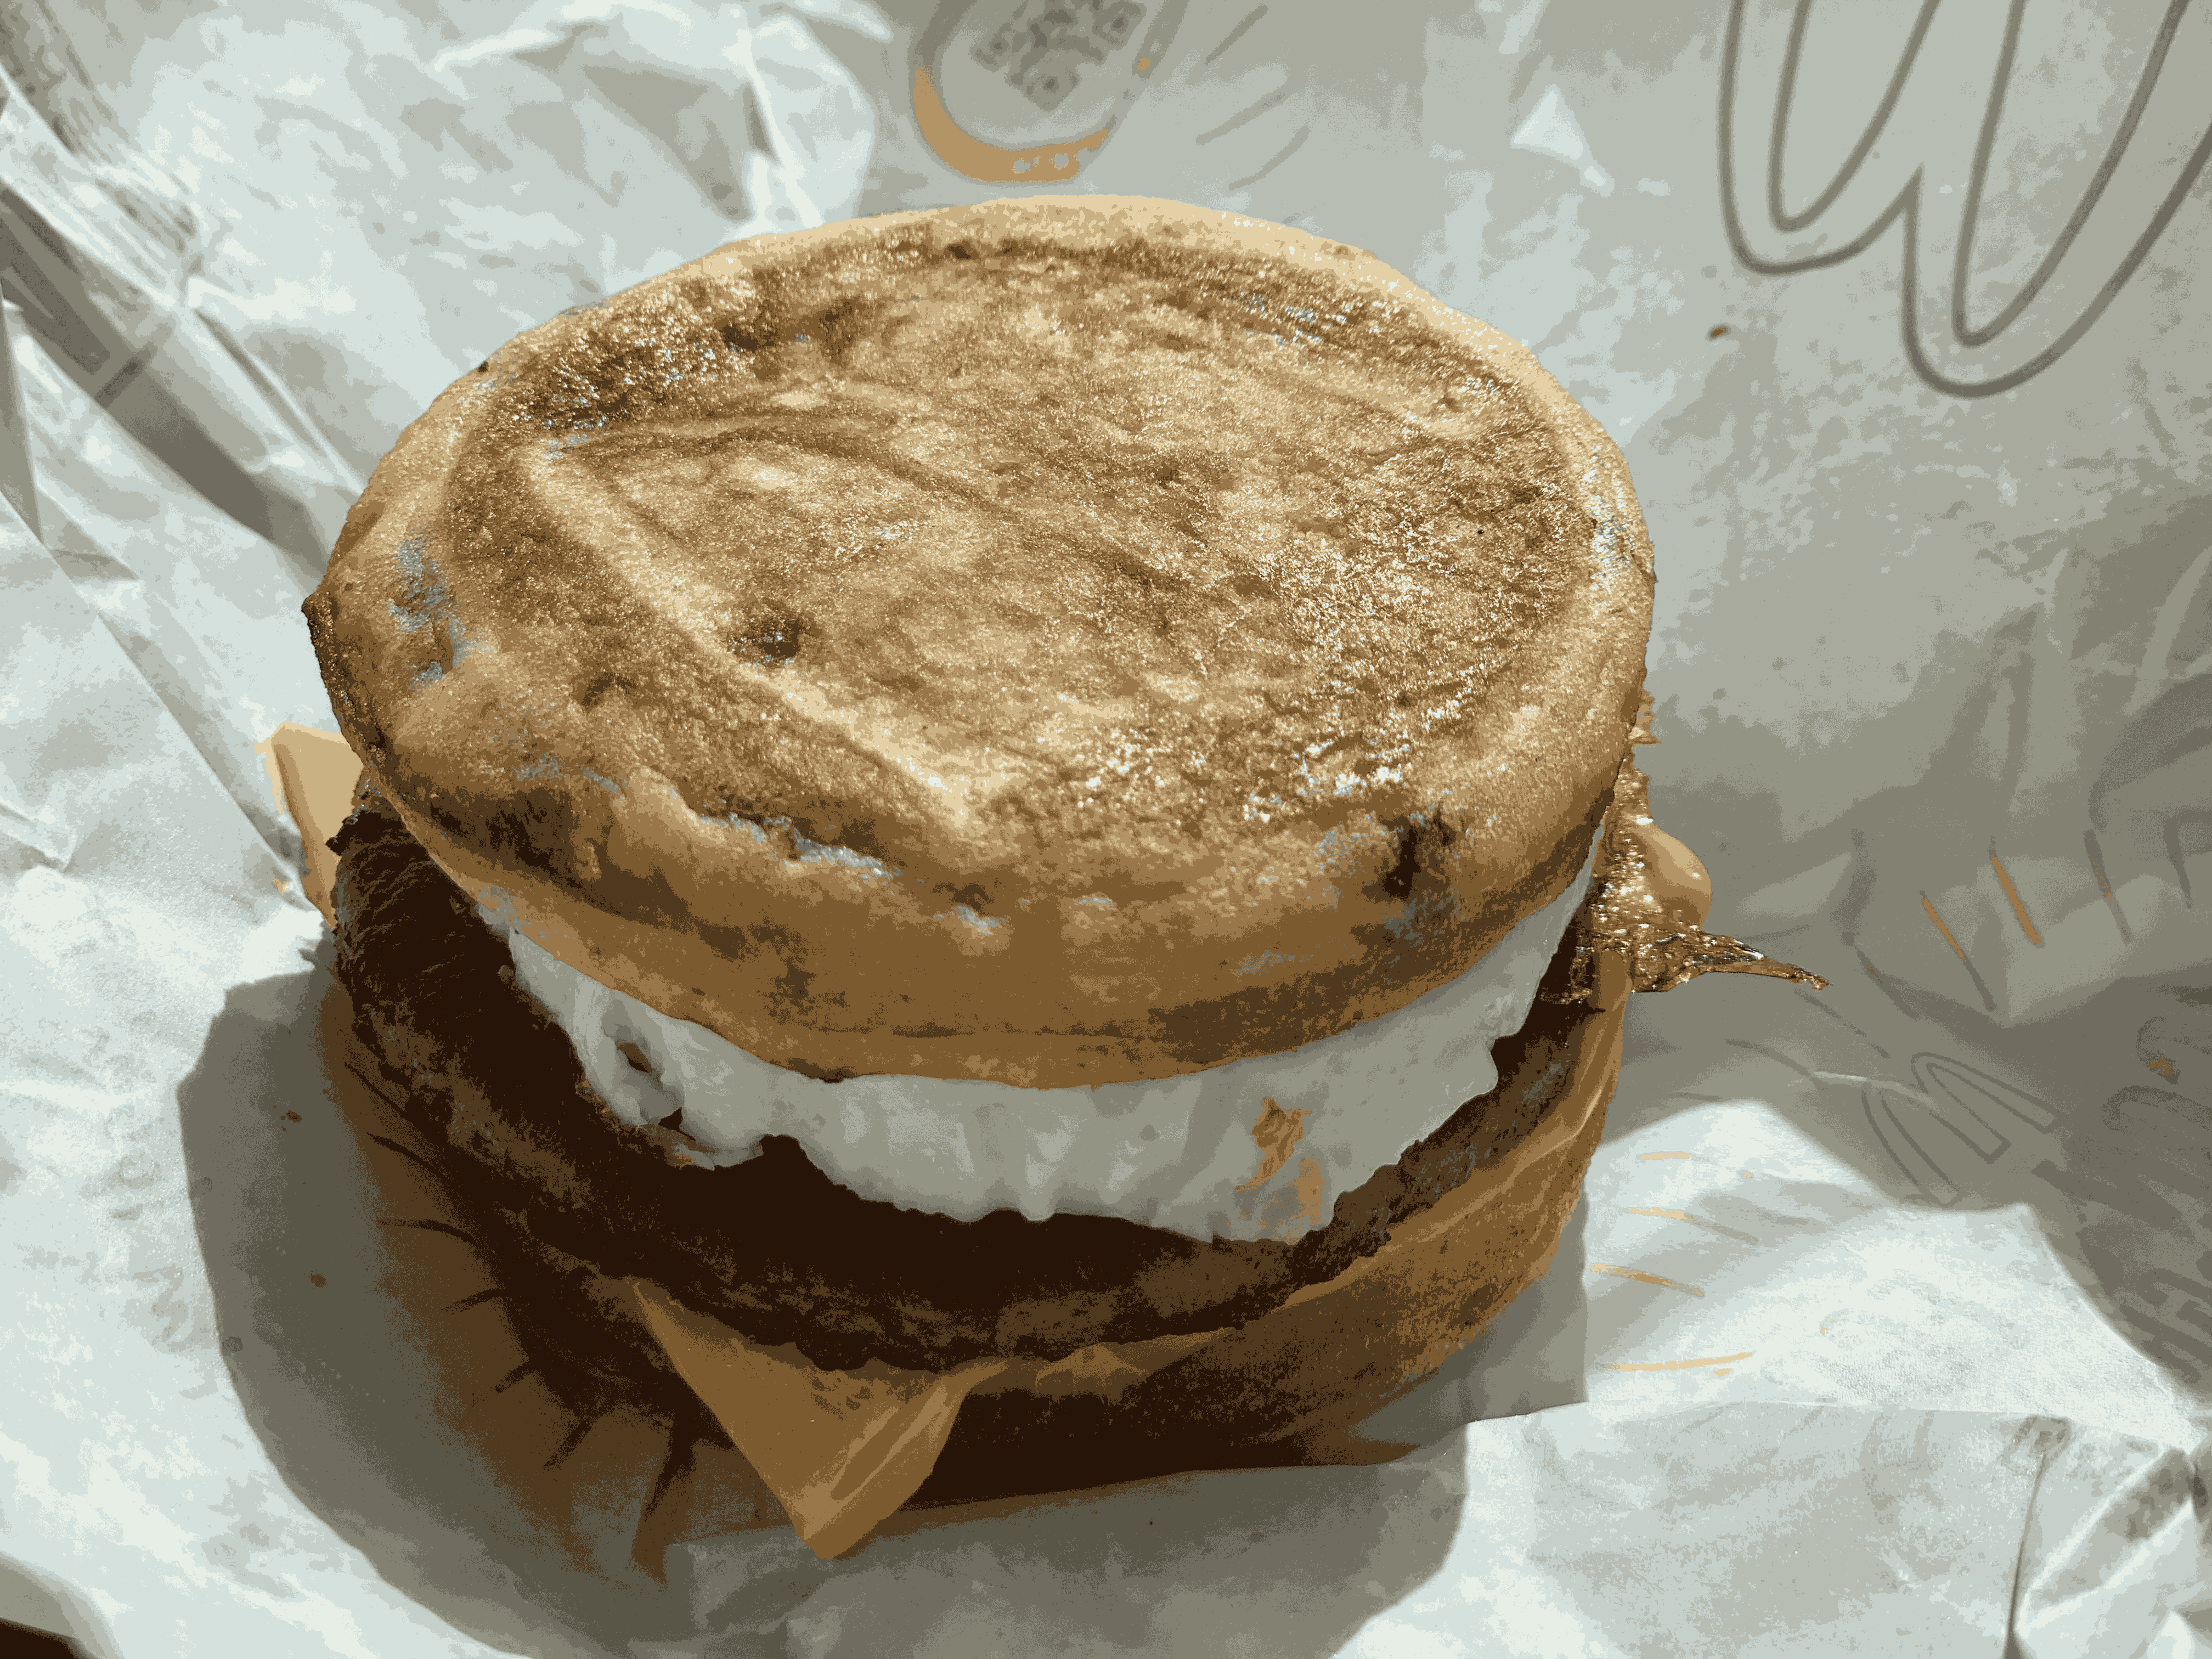

In [28]:
# Show the compressed image
display(compressed_image)

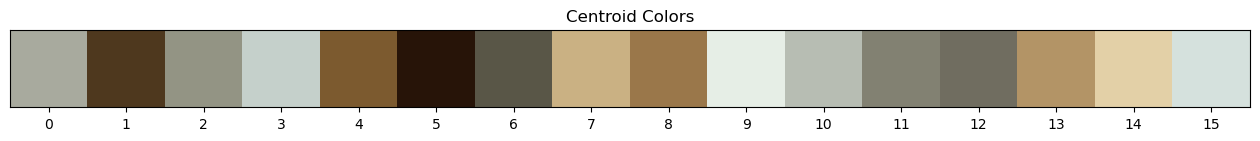

In [30]:
# Display the centroid colors
show_centroid_colors(kmeans)

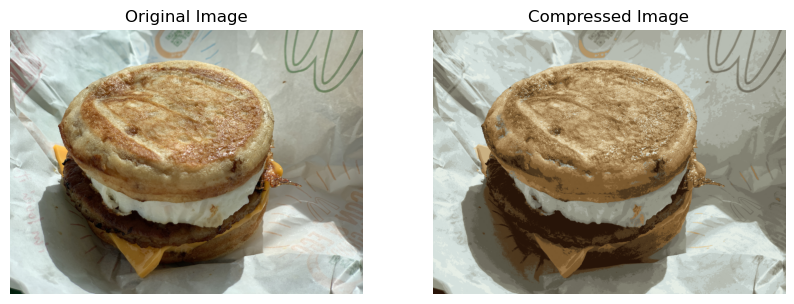

In [32]:
# Compare the original image and the compressed image side by side
show_images_side_by_side(image, compressed_image)